# Principal Component Analysis (PCA)

## Part I: Research Question

### A1. Research Question

Is it possible to utilize principal component analysis to decrease the number of subscriber features that effectively represent the dataset, and identify the features?

### A2. One Goal of the Data Analysis

The primary goal of this data analysis is to identify the best features to include when performing dimension reduction. The dataset currently has a very large number of features, the goal is to greatly reduce that number (the dimensionality), while also keeping the model's accuracy high.

## Part II: Method Justification

### B1. How PCA Analyzes the Data Set and Expected Outcomes

Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify large and complex datasets. It transforms it into a new set of uncorrelated orthogonal factors, the principal components (Patel, 2016). According to Bruce et al. (2020) the principal components are "weighted linear combinations of the original set." These components capture the most important patterns within the data, through finding the directions of maximum variance. 
To further explain the process, the creation of the first principal component is formed with a "linear combination of predictor variables that maximizes the percent of total variance explained" (Bruce et al., 2020). The process is repeated, but with each iteration the same variables are assigned different weights. The loadings are the weights that transform each predictor into the principal component. The loading matrix shows the loadings, in other words, how each feature contibutes to each principal component. A screeplot can be used to see the importance of each of the principal components (Bruce et al., 2020). Expected outcomes of PCA are that it reduces dimensionality, but the same time retains as much variance as possible.  The outcome of the feature count being reduced can improve and speed up machine learning algorithms and aid in data visualization (Naghshin, 2021).

### B2. One Assumption of PCA

One assumption of PCA is that the features are numeric and have been scaled. If any of the features are not scaled, the PCA model will give more, or less, weight to that feature resulting in a skewed data analysis.

## Part III: Data Preparation

### C1. Identify the continuous data set variables you will need to answer the PCA question in A1

The entire churn dataset contains information on 10,000 customers across various variables.  
   The 20 continuous variables that will be used in this data analysis include:
       Lat, Lng, Population, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8

### C2. Standardize the continuous data set variables in C1. Include a copy of the cleaned data set.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pylab
import statistics
import seaborn as sns
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from pca import pca
import warnings
warnings.filterwarnings('ignore')

print("Done.")

Done.


In [2]:
pca()

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 60)

print("Display size adjusted.")

Display size adjusted.


In [4]:
churn_df=pd.read_csv('Desktop/WGU/D212/churn_clean.csv')
print("Imported.")

Imported.


In [5]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

Removing non-numerical and discrete (non-continuous) features

In [7]:
churn_df=churn_df.drop(columns=['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip',
                                'Area','TimeZone','Job','Marital','Techie','Churn','Children',
                                'Port_modem','Tablet','InternetService','Phone','Multiple','OnlineSecurity',
                                'OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','PaymentMethod',
                                'Gender','Contract','StreamingTV','StreamingMovies'])

In [8]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Tenure                10000 non-null  float64
 10  MonthlyCharge         10000 non-null  float64
 11  Bandwidth_GB_Year     10000 non-null  float64
 12  Item1                 10000 non-null  int64  
 13  Item2                 10000 non-null  int64  
 14  Item3                 10000 non-null  int64  
 15  Item4               

**Assessing for missing values**

In [9]:
churn_df.isnull().sum()

Lat                     0
Lng                     0
Population              0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Item8                   0
dtype: int64

No nulls present.

In [10]:
churn_df.columns

Index(['Lat', 'Lng', 'Population', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [11]:
churn_df.shape

(10000, 20)

### Normalizing the Data

In [12]:
churn_df_normalized=(churn_df - churn_df.mean())/churn_df.std()

### Copy of Prepared Data Set

In [13]:
churn_df_normalized.to_csv('churn_prepared_pca_normalized.csv')

## Part IV: Analysis

Code sources: Datacamp (2020) and Taskesen (2022).

### D1. Determine the matrix of ALL the principal components

In [14]:
pca=PCA(n_components=20)
pca_model=pca.fit(churn_df_normalized)
pca_model

PCA(n_components=20)

In [15]:
outcomes=pd.DataFrame(pca.transform(churn_df_normalized),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                  'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'] )

In [16]:
outcomes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.920025,-1.426483,1.772021,-3.317079,2.282023,-0.883241,1.255834,0.216015,-1.564762,0.902181,0.310945,0.033760,-0.087779,0.796870,-0.756254,-0.248463,-0.215182,0.020335,0.007542,-0.045204
1,-0.202575,-1.633654,0.542190,-0.664257,-0.502667,-0.639435,-0.093462,-2.091168,-0.299997,0.768436,0.412112,0.928240,-0.436002,0.897266,0.953233,0.413126,0.227858,-0.409225,-0.697592,-0.051921
2,-0.693221,-0.961929,0.137472,-1.672810,1.823476,-0.897682,0.849231,-0.959090,-1.356276,-0.018349,-0.219708,0.003035,0.166083,-0.211456,-0.309613,0.310108,0.954842,-1.353841,0.437469,0.081050
3,0.011003,-0.730495,2.177475,0.851251,0.600940,-2.263920,0.112037,0.617392,0.113830,-1.675170,0.372235,-0.756158,-0.069584,-1.351723,-0.014870,-0.702610,0.414001,0.236293,0.033243,0.117371
4,1.352806,-1.791690,0.751686,1.599739,-0.101494,0.527265,0.962917,1.446853,-0.579899,-0.467914,1.233251,0.227092,-1.482664,-0.991219,0.181972,0.118133,0.122770,0.204826,-0.103717,-0.080498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.109493,1.838249,0.193151,-0.880709,-0.760096,0.362667,-1.089729,0.098054,1.340352,-0.933546,-0.429368,0.594306,-0.311452,0.809040,-0.524915,-0.648516,-0.085607,0.521233,0.602017,0.091214
9996,1.921310,1.554479,0.724200,3.584862,0.767116,-1.325312,0.035259,1.201518,0.187840,0.648409,-0.404838,1.171135,-0.448324,3.136714,-1.624381,-0.878551,0.464442,0.481631,-0.852771,-0.009942
9997,1.445702,0.628548,0.021820,-0.244695,0.974654,0.590051,-0.721832,-0.038711,-0.072846,0.911548,-0.795715,-0.082671,-1.247405,-0.762049,-0.209383,0.441112,0.561806,0.268592,-0.068988,-0.101492
9998,1.992081,2.107722,-0.005823,1.969418,-0.838301,-1.661974,-0.489898,-0.679849,0.019016,0.799374,-0.190674,0.695692,0.640674,0.544179,0.298145,1.518507,-1.140842,1.179011,-0.353704,-0.078847


In [17]:
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                   'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'],
                      index=churn_df_normalized.columns).T
loadings

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
PC1,-0.001111,0.008029,-0.002168,0.006573,0.001001,-0.017498,0.008784,-0.008681,-0.007722,-0.016290,0.000999,-0.016857,0.458701,0.433813,0.400512,0.145800,-0.175673,0.405027,0.358221,0.308737
PC2,-0.023125,0.009230,-0.000667,0.001023,0.005635,0.003887,-0.019811,0.003801,0.017556,0.702355,0.040055,0.703626,0.031152,0.038418,0.035484,-0.039267,0.056161,-0.006533,0.001911,-0.013136
PC3,-0.007460,0.021908,0.015991,-0.027480,0.025201,-0.014251,-0.002988,-0.010570,0.007757,-0.062572,-0.008642,-0.062152,0.281113,0.282140,0.280772,-0.568383,0.587419,-0.183785,-0.181559,-0.131382
PC4,-0.713779,0.178932,0.652434,0.053108,-0.055276,0.014016,0.150168,0.027737,-0.006781,-0.008094,-0.003728,-0.009136,-0.011432,-0.019230,-0.003734,-0.005043,-0.009349,0.012678,-0.020058,0.045180
PC5,0.039663,-0.666428,0.309469,-0.206585,0.138665,-0.297621,-0.159116,-0.293715,0.151995,0.024235,-0.414663,0.004769,-0.015257,-0.007246,0.003842,0.000404,0.001926,0.017961,0.013235,-0.000470
PC6,-0.135767,0.522901,-0.199941,0.176767,0.327293,-0.496684,-0.251927,-0.166794,0.324277,0.008909,-0.289596,-0.014990,-0.005291,-0.027987,-0.005454,0.014471,-0.012558,-0.010581,0.029486,-0.017337
PC7,0.027986,-0.233944,0.141433,0.482506,0.134448,0.255012,-0.404287,0.370030,0.517414,-0.017360,0.186392,-0.020115,0.010710,0.022505,-0.031604,-0.020531,0.016253,0.013660,-0.010093,0.049350
PC8,0.087722,-0.172714,0.029619,0.486734,0.111718,-0.433275,0.315259,0.483286,-0.387086,0.028389,-0.187273,0.000782,-0.015148,0.006231,-0.003577,-0.011128,0.028935,0.009641,0.040788,-0.053045
PC9,-0.052594,0.029899,0.033018,-0.410513,0.798151,0.187655,-0.076178,0.310381,-0.209633,-0.012463,0.043111,0.005219,-0.019644,-0.005218,-0.033023,-0.023725,-0.012313,0.013966,0.060566,0.016153
PC10,0.006577,-0.130617,0.079180,0.261884,0.285816,-0.253743,-0.037565,-0.482358,-0.212914,-0.033617,0.692903,0.002914,-0.010717,-0.006835,-0.012234,-0.013385,0.000198,-0.000070,-0.013534,0.025043


### D2. Identify the Total Number of Principal Components, using the Elbow Rule or Kaiser's Criterion, including the Scree Plot

In [18]:
cov_matrix=np.dot(churn_df_normalized.T,churn_df_normalized) / churn_df.shape[0]
eigenvalues=[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

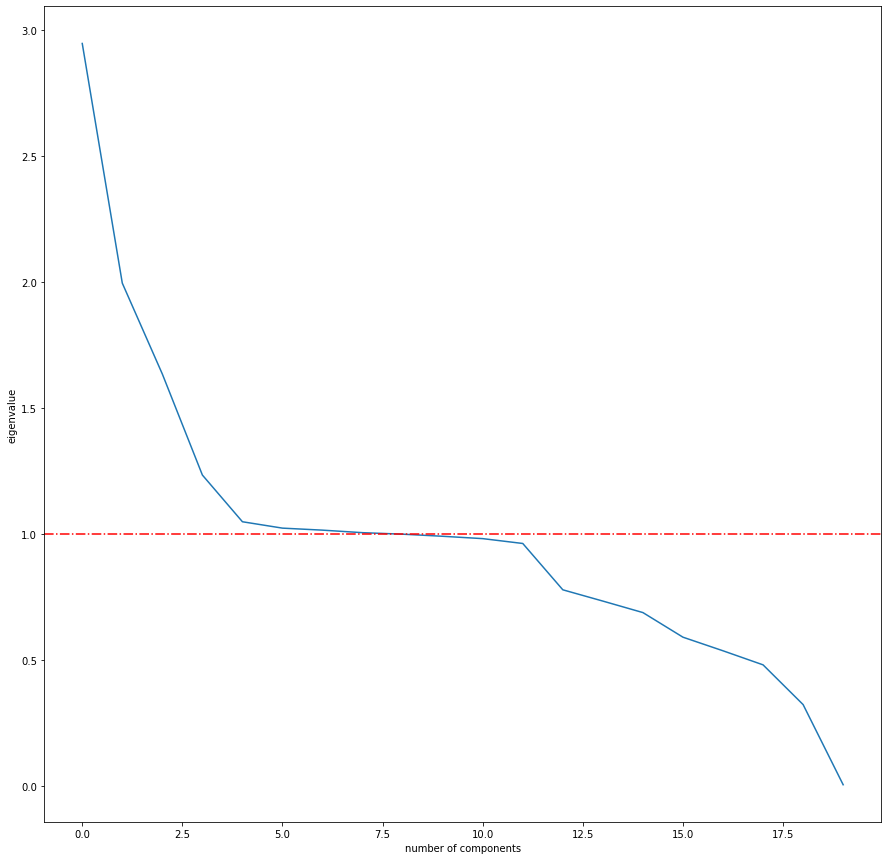

In [19]:
plt.figure(figsize=(15,15))
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='r', linestyle='dashdot')
plt.show()

Following the Kaiser Rule, PC1, PC2, PC3, PC4, PC5, and PC6 will be kept as they have eigenvalues greater than 1. This corresponds to them being better at explaining the variance within the dataset (Larose & Larose, 2019).

### D3. Identify the Variance of Each of the Principal Components Identified in D2

Variance explained by each of the 6 principal components:
PC1: 0.1474
PC2: 0.0999
PC3: 0.0818
PC4: 0.0617
PC5: 0.0523
PC6: 0.0512


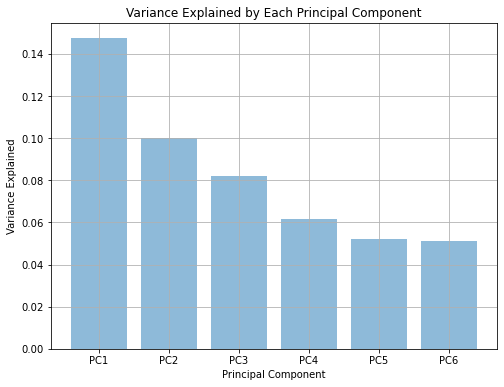

In [20]:
pca = PCA(n_components=6)
pca_model = pca.fit(churn_df_normalized)
outcomes = pd.DataFrame(pca.transform(churn_df_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                        index=churn_df_normalized.columns).T

cov_matrix = np.dot(churn_df_normalized.T, churn_df_normalized) / churn_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Variance explained by each of the 6 principal components
explained_variance_ratio = pca.explained_variance_ratio_

print("Variance explained by each of the 6 principal components:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var_ratio:.4f}")

plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, 7), explained_variance_ratio, align='center', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(np.arange(1, 7), ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
plt.grid(True)
plt.show()

### D4. Identify the Total Variance captured by the principal components identified in D2

In [21]:
total_variance = sum(explained_variance_ratio)

print(f"Total variance captured by the 6 principal components: {total_variance:.4f}")

Total variance captured by the 6 principal components: 0.4943


### D5. Summarize the Results of your Analysis

The results of the principal component analysis will allow for data reduction and determination of which components are most important for explaining covariation. In this case, PC1, PC2, PC3, PC4, PC5, and PC6 based upon their respective eigenvalues being greater than 1, are the best components for explaining the covariation within the data (Larose & Larose, 2019). Reducing the data will also assist machine learning algorithms to run faster without having to process the extraneous variables (Larose & Larose, 2019).

### Code Sources

Datacamp. (n.d). *Dimensionality reduction in python*. https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python

Taskesen, E. (2022). *PCA documentation!*. https://erdogant.github.io/pca/pages/html/index.html

### Additional Sources

Bruce, P., Bruce, A., & Gedeck, P. (2020). *Practical statistics for data scientists : 50+ essential concepts using r and python.* O'Reilly Media, Incorporated.

Larose, C.D., & Larose, D.T. (2019). *Data science using Python and R.* John Wiley & Sons.

Naghshin, V. (2021). *PCA and how to interpret it - with Python.* Analytics Vidhya. https://medium.com/analytics-vidhya/pca-and-how-to-interpret-it-with-python-8aa664f7a69a

Patel, M. (2016). *Principal component analysis(PCA): An unsupervised learning.* RPubs. https://rpubs.com/maulikpatel/231900